# Introduction.

##### MRL Eye Dataset was created by xyz. Give a short summary of what the code is doing and the final results.

# Import Libraries

In [ ]:
import os
import shutil

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D, AvgPool2D, BatchNormalization
from tensorflow.keras.models import Sequential

# Import MRL Eye Dataset from Web 




In [ ]:
!wget http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
!unzip -q mrlEyes_2018_01.zip

--2023-03-10 22:58:11--  http://mrl.cs.vsb.cz/data/eyedataset/mrlEyes_2018_01.zip
Resolving mrl.cs.vsb.cz (mrl.cs.vsb.cz)... 158.196.141.22
Connecting to mrl.cs.vsb.cz (mrl.cs.vsb.cz)|158.196.141.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341866898 (326M) [application/zip]
Saving to: ‘mrlEyes_2018_01.zip’

mrlEyes_2018_01.zip 100%[===================>] 326.03M  6.98MB/s    in 40s     

2023-03-10 22:58:52 (8.08 MB/s) - ‘mrlEyes_2018_01.zip’ saved [341866898/341866898]



# Sparse Data into labelled Open & Closed Images  

In [ ]:
# Define the path to the directory where the files were extracted
directory = '/content/mrlEyes_2018_01'

# Define the path to the "dataset" folder
dataset_dir = '/content/dataset'

# Create new folders named "open", "closed", and "invalid" inside the "dataset" folder
os.makedirs(os.path.join(dataset_dir, 'open'), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'closed'), exist_ok=True)
#os.makedirs(os.path.join(dataset_dir, 'invalid'), exist_ok=True)

# Loop through all files in the directory
for folder in os.listdir(directory):
    # Get the path to the current folder
    folder_path = os.path.join(directory, folder)

    # Check if the current item in the directory is a folder
    if os.path.isdir(folder_path):
        # Loop through all files in the folder
        for filename in os.listdir(folder_path):
            # Check if the file is a PNG image
            if filename.endswith(".png"):
                # Get the 16th character of the filename
                label = filename[16]

                # Determine if the image is open or closed
                if label == "0":
                    # Move the file to the "closed" folder
                    src_path = os.path.join(folder_path, filename)
                    dst_path = os.path.join(dataset_dir, 'closed', filename)
                    shutil.move(src_path, dst_path)
                elif label == "1":
                    # Move the file to the "open" folder
                    src_path = os.path.join(folder_path, filename)
                    dst_path = os.path.join(dataset_dir, 'open', filename)
                    shutil.move(src_path, dst_path)
                # else:
                #     # Move the file to the "invalid" folder
                #     src_path = os.path.join(folder_path, filename)
                #     dst_path = os.path.join(dataset_dir, 'invalid', filename)
                #     shutil.move(src_path, dst_path)

# Check Number of Labelled Images

In [ ]:
# Define the path to the "closed" folder
closed_folder = '/content/dataset/closed'

# Count the total number of PNG files in the "closed" folder
num_png_files = len([f for f in os.listdir(closed_folder) if f.endswith('.png')])

# Print the total number of PNG files in the "closed" folder
print("Total number of PNG files in 'closed' folder:", num_png_files)

Total number of PNG files in 'closed' folder: 41946


In [ ]:
# Define the path to the "open" folder
open_folder = '/content/dataset/open'

# Count the total number of PNG files in the "open" folder
num_png_files = len([f for f in os.listdir(open_folder) if f.endswith('.png')])

# Print the total number of PNG files in the "open" folder
print("Total number of PNG files in open' folder:", num_png_files)

Total number of PNG files in open' folder: 42952


# Cleaning & Preprocessing Data

In [ ]:
# # Set up the data generators
# datagen = ImageDataGenerator(
#     rescale=1./255,
#     validation_split=0.2
# )

# Creating Train Test and Validation Split

In [ ]:
# train_generator = datagen.flow_from_directory(
#     dataset_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='binary',
#     subset='training'
# )

Found 67919 images belonging to 2 classes.


In [ ]:
# val_generator = datagen.flow_from_directory(
#     dataset_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='binary',
#     subset='validation'
# )

Found 16979 images belonging to 2 classes.


# Creating CNN Model

In [ ]:
# # Define the CNN model
# model = Sequential([
#     Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
#     MaxPooling2D(2,2),
#     Conv2D(64, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(128, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     Conv2D(256, (3,3), activation='relu'),
#     MaxPooling2D(2,2),
#     GlobalAveragePooling2D(),
#     Dense(512, activation='relu'),
#     Dropout(0.2),
#     Dense(2, activation='softmax')
# ])

# model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

# Model Compliation

In [ ]:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training

In [ ]:
# history = model.fit(train_generator,
#                     epochs=10,
#                     validation_data=val_generator)

Epoch 1/10
2123/2123 [==============================] - 159s 69ms/step - loss: 0.4942 - accuracy: 0.7385 - val_loss: 0.8080 - val_accuracy: 0.6937
Epoch 2/10
2123/2123 [==============================] - 151s 71ms/step - loss: 0.2229 - accuracy: 0.9109 - val_loss: 0.6289 - val_accuracy: 0.7359
Epoch 3/10
2123/2123 [==============================] - 150s 71ms/step - loss: 0.1312 - accuracy: 0.9510 - val_loss: 0.2888 - val_accuracy: 0.8818
Epoch 4/10
 715/2123 [=========>....................] - ETA: 1:18 - loss: 0.1008 - accuracy: 0.9616

# Model Evaluation

In [ ]:
# test_loss, test_acc = model.evaluate(test_generator)

# print('Test accuracy:', test_acc)

# Data Split

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory = "dataset", 
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)
validation_generator =  validation_datagen.flow_from_directory(directory = "dataset", 
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 67919 images belonging to 2 classes.
Found 16979 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'closed': 0, 'open': 1}

# Create CNN Model

In [ ]:
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
#32 convolution filters used each of size 3x3
#again
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),

#64 convolution filters used each of size 3x3
#choose the best features via pooling
    
#randomly turn neurons on and off to improve convergence
    Dropout(0.25),
#flatten since too many dimensions, we only want a classification output
    Flatten(),
#fully connected to get all relevant data
    Dense(128, activation='relu'),
#one more dropout for convergence' sake :) 
#    Dropout(0.5),
#output a softmax to squash the matrix into output probabilities
    Dense(2, activation='softmax')
])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

# Model Compliation

In [ ]:
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


# Model Training

In [ ]:
history = cnn_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
2123/2123 [==============================] - 66s 25ms/step - loss: 0.7385 - categorical_accuracy: 0.9314 - precision: 0.9314 - recall: 0.9314 - val_loss: 0.3314 - val_categorical_accuracy: 0.8776 - val_precision: 0.8776 - val_recall: 0.8776
Epoch 2/10
2123/2123 [==============================] - 51s 24ms/step - loss: 0.0853 - categorical_accuracy: 0.9697 - precision: 0.9697 - recall: 0.9697 - val_loss: 0.2501 - val_categorical_accuracy: 0.9001 - val_precision: 0.9001 - val_recall: 0.9001
Epoch 3/10
2123/2123 [==============================] - 51s 24ms/step - loss: 0.0662 - categorical_accuracy: 0.9776 - precision: 0.9776 - recall: 0.9776 - val_loss: 0.2506 - val_categorical_accuracy: 0.9200 - val_precision: 0.9200 - val_recall: 0.9200
Epoch 4/10
2123/2123 [==============================] - 53s 25ms/step - loss: 0.0612 - categorical_accuracy: 0.9786 - precision: 0.9786 - recall: 0.9786 - val_loss: 0.2868 - val_categorical_accuracy: 0.8926 - val_precision: 0.8926 - val_recall:

### Plots

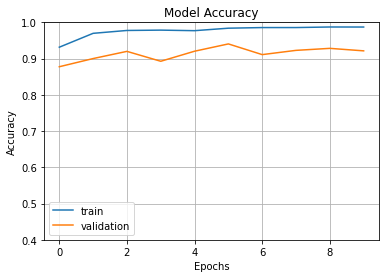

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Model Evaluation